In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:


df=pd.read_csv("Daily activity metrics.csv")
df.head()

,Date,Move Minutes count,Calories (kcal),Distance (m),Heart Points,Heart Minutes,Average speed (m/s),Max speed (m/s),Min speed (m/s),Step count,Average weight (kg),Max weight (kg),Min weight (kg),Cycling duration (ms),Walking duration (ms),Running duration (ms),Calisthenics duration (ms)
0,2022-08-03,67.0,617.878588,3413.194972,18.0,18.0,0.565501,1.459932,0.298564,5364,52.0,52.0,52.0,NaN,3889928.0,NaN,NaN
1,2022-08-04,41.0,1394.882813,1699.767803,NaN,NaN,0.402249,1.160393,0.257383,3125,NaN,NaN,NaN,NaN,1343690.0,NaN,NaN
2,2022-08-05,6.0,1351.692386,234.169271,NaN,NaN,0.373200,0.872139,0.288269,616,NaN,NaN,NaN,NaN,246274.0,NaN,NaN
3,2022-08-06,3.0,1347.269729,126.632257,NaN,NaN,0.341263,0.428228,0.267678,506,NaN,NaN,NaN,NaN,133899.0,NaN,NaN
4,2022-08-07,42.0,1429.756733,2211.826682,12.0,12.0,0.426071,1.210147,0.257383,3610,NaN,NaN,NaN,NaN,1990308.0,101564.0,NaN


In [23]:
df.set_index(df['Date'], inplace=True)

In [65]:
df1=df[['Date','Calories (kcal)','Step count','Heart Points']]
df1.head(10)

,Date,Calories (kcal),Step count,Heart Points
0,2022-08-03,617.878588,5364,18.0
1,2022-08-04,1394.882813,3125,NaN
2,2022-08-05,1351.692386,616,NaN
3,2022-08-06,1347.269729,506,NaN
4,2022-08-07,1429.756733,3610,12.0
5,2022-08-08,1372.833066,1828,NaN
6,2022-08-09,1341.999853,2765,NaN
7,2022-08-10,1341.999982,1168,NaN
8,2022-08-11,1411.598140,2222,2.0
9,2022-08-12,1376.477572,2854,1.0


In [66]:
df1.isna().sum()

Date                 0
Calories (kcal)      0
Step count           0
Heart Points       123
dtype: int64

In [67]:
df1.loc[:,'Heart Points'] = df1['Heart Points'].fillna(df1['Heart Points'].mean())

In [68]:
df1.isna().sum()

Date               0
Calories (kcal)    0
Step count         0
Heart Points       0
dtype: int64

In [70]:
df1.describe()

,Calories (kcal),Step count,Heart Points
count,450.000000,450.000000,450.000000
mean,1444.428047,5242.166667,19.079511
std,122.325767,3753.861811,11.628811
min,617.878588,11.000000,1.000000
25%,1341.999868,2010.750000,12.000000
50%,1439.960397,4909.000000,19.079511
75%,1517.775857,7737.250000,22.000000
max,1858.123257,18782.000000,72.000000


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             450 non-null    object 
 1   Calories (kcal)  450 non-null    float64
 2   Step count       450 non-null    int64  
 3   Heart Points     450 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.2+ KB


In [72]:
df1.dtypes

Date                object
Calories (kcal)    float64
Step count           int64
Heart Points       float64
dtype: object

In [31]:
df1

,Calories (kcal),Step count,Heart Points
Date,,,
2022-08-03,617.878588,5364,18.000000
2022-08-04,1394.882813,3125,19.079511
2022-08-05,1351.692386,616,19.079511
2022-08-06,1347.269729,506,19.079511
2022-08-07,1429.756733,3610,12.000000
...,...,...,...
2023-10-22,1453.402120,5734,3.000000
2023-10-23,1328.092026,1128,19.079511
2023-10-24,1314.249209,422,19.079511


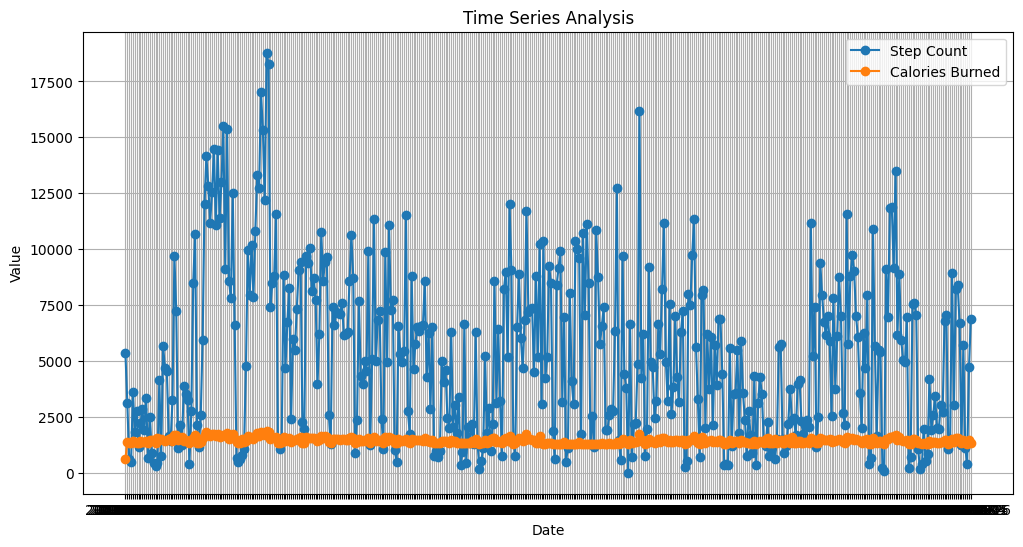

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Step count'], label='Step Count', marker='o')
plt.plot(df['Date'], df['Calories (kcal)'], label='Calories Burned', marker='o')
plt.title('Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima_model import ARIMA

In [77]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select all columns except 'Date'
cols_to_scale = [col for col in df1.columns if col != 'Date']

# Fit the scaler to the selected columns
scaler.fit(df1[cols_to_scale])

# Transform the selected columns
df1.loc[:,cols_to_scale] = scaler.transform(df1[cols_to_scale])


In [78]:
df1

,Date,Calories (kcal),Step count,Heart Points
0,2022-08-03,-6.764473,0.032492,-9.293402e-02
1,2022-08-04,-0.405478,-0.564625,8.100140e-17
2,2022-08-05,-0.758948,-1.233747,8.100140e-17
3,2022-08-06,-0.795143,-1.263083,8.100140e-17
4,2022-08-07,-0.120070,-0.435281,-6.094681e-01
...,...,...,...,...
445,2023-10-22,0.073444,0.131166,-1.384269e+00
446,2023-10-23,-0.952093,-1.097202,8.100140e-17
447,2023-10-24,-1.065382,-1.285485,8.100140e-17
448,2023-10-25,0.079605,-0.138989,-7.816462e-01


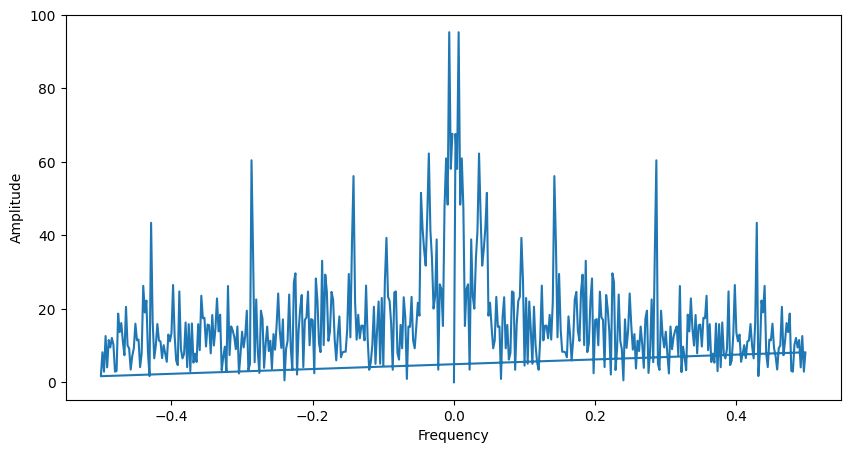

In [88]:
data = df1['Step count'].values

# Apply Fast Fourier Transform (FFT)
fft_vals = np.fft.fft(data)

# Get absolute value of FFT values
fft_abs = np.abs(fft_vals)

# Get frequencies for FFT values
fft_freq = np.fft.fftfreq(len(data))

# Plot the frequencies
plt.figure(figsize=(10, 5))
plt.plot(fft_freq, fft_abs)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

In [85]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 1, 1, 1  # Example order parameters
model = ARIMA(df2['Step count'], order=(p, d, q))
results = model.fit()

In [89]:
# Forecast future values
forecast_steps = 30  # Number of future steps to forecast
forecast, stderr, conf_int = results.forecast(steps=forecast_steps)


# Plot the original data
plt.plot(df1['Step count'], label='Original')

# Plot the forecasted values
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps, closed='right'), forecast, color='red', label='Forecast')

plt.legend()
plt.show()

ValueError: too many values to unpack (expected 3)

In [91]:

stl = STL(df1['Step count'], seasonal=7)
result = stl.fit()
seasonal, trend, residuals = result.seasonal, result.trend, result.resid

# Plot the original time series and its decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Step_Count'], label='Original')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(df.index, trend, label='Trend')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(df.index, seasonal, label='Seasonal')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(df.index, residuals, label='Residuals')
plt.legend()
plt.tight_layout()
plt.show()


ValueError: Unable to determine period from endog

# Training and testing

In [43]:
from sklearn.model_selection import train_test_split

X=n_df1[['Calories (kcal)', 'Step count']]
y=n_df1[['Heart Points']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [45]:
y_pred=model.predict(X_test)
y_pred

array([[33.62054363],
       [ 1.63940197],
       [16.63824307],
       [ 6.70168196],
       [18.79261807],
       [17.81061992],
       [14.48957082],
       [-0.55463886],
       [17.5791319 ],
       [-1.10631422],
       [13.86313702],
       [ 8.20621069],
       [39.84157639],
       [31.08060929],
       [18.36939268],
       [21.41820427],
       [22.76709621],
       [23.59072067],
       [53.5432544 ],
       [ 2.08275341],
       [45.17270528],
       [24.56264765],
       [-0.74339888],
       [ 6.61860841],
       [19.8428    ],
       [ 3.90231929],
       [-0.1212583 ],
       [31.03048101],
       [ 1.51094046],
       [15.90607608],
       [ 1.44643721],
       [11.09791679],
       [ 8.62840679],
       [17.07648104],
       [54.99061863],
       [ 9.62631467],
       [-0.63925646],
       [ 0.88848574],
       [20.66169682],
       [15.1739836 ],
       [23.17467064],
       [13.06629469],
       [49.72755036],
       [21.3812712 ],
       [ 2.87563826],
       [ 5

In [47]:
y_test


,Heart Points
407,19.0
444,0.0
117,21.0
30,19.0
415,27.0
...,...
29,15.0
298,8.0
285,65.0
26,60.0


In [66]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
poly.fit(X_poly_train, y_train)
model.fit(X_poly_train, y_train)

LinearRegression()

In [78]:
y_pred= model.predict(X_poly_test)
y_pred

array([[33.62054363],
       [ 1.63940197],
       [16.63824307],
       [ 6.70168196],
       [18.79261807],
       [17.81061992],
       [14.48957082],
       [-0.55463886],
       [17.5791319 ],
       [-1.10631422],
       [13.86313702],
       [ 8.20621069],
       [39.84157639],
       [31.08060929],
       [18.36939268],
       [21.41820427],
       [22.76709621],
       [23.59072067],
       [53.5432544 ],
       [ 2.08275341],
       [45.17270528],
       [24.56264765],
       [-0.74339888],
       [ 6.61860841],
       [19.8428    ],
       [ 3.90231929],
       [-0.1212583 ],
       [31.03048101],
       [ 1.51094046],
       [15.90607608],
       [ 1.44643721],
       [11.09791679],
       [ 8.62840679],
       [17.07648104],
       [54.99061863],
       [ 9.62631467],
       [-0.63925646],
       [ 0.88848574],
       [20.66169682],
       [15.1739836 ],
       [23.17467064],
       [13.06629469],
       [49.72755036],
       [21.3812712 ],
       [ 2.87563826],
       [ 5